# Keras LeNet: Recognizing Handwritten Digits (MNIST)

In [2]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [4]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [5]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 55MB download may take a minute)
print("[INFO] accessing MNIST...")
dataset = datasets.fetch_mldata("MNIST Original")
data = dataset.data

[INFO] accessing MNIST...


/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    data = data.reshape(data.shape[0], 28, 28, 1)

In [8]:
# scale the input data to the range [0, 1] and perform a train/test split
(trainX, testX, trainY, testY) = train_test_split(data/255.0, dataset.target.astype("int"), test_size=0.25, random_state=42)

# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.transform(testY)

In [9]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 21s 397us/step - loss: 1.0414 - acc: 0.7330 - val_loss: 0.4191 - val_acc: 0.8645
Epoch 2/20
52500/52500 [==============================] - 19s 365us/step - loss: 0.2706 - acc: 0.9211 - val_loss: 0.2519 - val_acc: 0.9225
Epoch 3/20
52500/52500 [==============================] - 19s 366us/step - loss: 0.1906 - acc: 0.9440 - val_loss: 0.1753 - val_acc: 0.9451
Epoch 4/20
52500/52500 [==============================] - 19s 365us/step - loss: 0.1513 - acc: 0.9557 - val_loss: 0.5125 - val_acc: 0.8252
Epoch 5/20
52500/52500 [==============================] - 19s 366us/step - loss: 0.1265 - acc: 0.9622 - val_loss: 0.1189 - val_acc: 0.9637
Epoch 6/20
52500/52500 [==============================] - 19s 366us/step - loss: 0.1073 - acc: 0.9683 - val_loss: 0.1039 - val_acc: 0.9693
Epoch 7/20
52500/52500 [==============================] - 19s 3

In [10]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in labelBinarizer.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1677
           1       0.99      0.99      0.99      1935
           2       0.98      0.99      0.99      1767
           3       0.98      0.98      0.98      1766
           4       0.99      0.99      0.99      1691
           5       0.99      0.98      0.98      1653
           6       0.99      0.99      0.99      1754
           7       0.98      0.99      0.99      1846
           8       0.98      0.97      0.97      1702
           9       0.97      0.98      0.98      1709

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



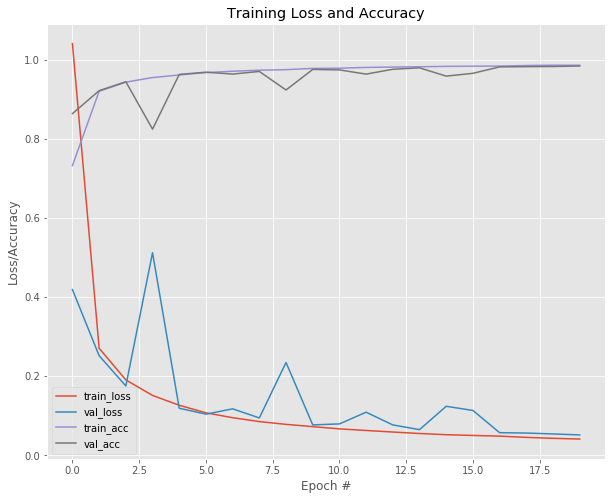

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()